# Analytic Report Project

## 1. Introduction
We get the data set from https://www.kaggle.com/tmdb/tmdb-movie-metadata, and create an analytic report to answer three below questions
> - What areas have the most influence on revenue?
> - How is movie's revenue and average score affected by its genre?
> - What influence does release date have on revenue?
>
In order to answer above questions, The report will include the introduction, describing the data, visualiztions, filtering data to different categories, analysis (include t-test or f-test for Hypothesis testing) and conclusions.

## 2. Describing the data

### 2.1 First look at the data

In [28]:
# Render our plot inline
%matplotlib inline

# Import the necessary library for this report
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
import re

# Make a graph prettier and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
# Size of the dataset
df.shape

(4803, 20)

In [4]:
# Name and data type of the features
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [5]:
# Having the first look at the dataset
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


The dataset contains the following features:
> - budget - The budget in which the movie was made.
> - genre - The genre of the movie, Action, Comedy ,Thriller etc.
> - homepage - A link to the homepage of the movie.
> - id - This is infact the movie_id as in the first dataset.
> - keywords - The keywords or tags related to the movie.
> - original_language - The language in which the movie was made.
> - original_title - The title of the movie before translation or adaptation.
> - overview - A brief description of the movie.
> - popularity - A numeric quantity specifying the movie popularity.
> - production_companies - The production house of the movie.
> - production_countries - The country in which it was produced.
> - release_date - The date on which it was released.
> - revenue - The worldwide revenue generated by the movie.
> - runtime - The running time of the movie in minutes.
> - status - "Released" or "Rumored".
> - tagline - Movie's tagline.
> - title - Title of the movie.
> - vote_average - average ratings the movie recieved.
> - vote_count - the count of votes recieved.
>
And there are total 4803 movies with 20 features.

In [9]:
# Descriptive statistic of numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [10]:
# Decriptive statistic of non-numeric data
df.describe(include="object")

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,4803,1712,4803,4803,4803,4800,4803,4803,4802,4803,4803,3959,4803
unique,1175,1691,4222,37,4801,4800,3697,469,3280,544,3,3944,4800
top,[Drama],http://www.thehungergames.movie/,[],en,Out of the Blue,An associative collection of visual impression...,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[o_639_1 en, English]",Released,Based on a true story.,Out of the Blue
freq,370,4,412,4505,2,1,351,2977,10,3171,4795,3,2


Based on rows "count" of two above descriptive statistic tables, we can see that the data with missing values are: runtime, homepage, overview, release_date and tagline. We need to handle these missing values in the most reasonable way.

### 2.2 Cleaning the data

We will check missing values in each values

In [11]:
# Check missing values of runtime feature
df[df.runtime.isnull()] 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,[Drama],NaN,370980,"[pope, biography]",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[o_639_1 es, Espa\u00f1ol]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,[Documentary],NaN,459488,"[music, actors, legendary perfomer, classic ho...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0


In [12]:
# Check missing values of homepage feature
df[df.homepage.isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
15,225000000,"[Adventure, Family, Fantasy]",NaN,2454,"[based on novel, fictional place, brother sist...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...","[{""iso_3166_1"": ""CZ"", ""name"": ""Czech Republic""...",2008-05-15,419651413,150.0,"[o_639_1 en, English]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630
24,207000000,"[Adventure, Drama, Action]",NaN,254,"[film business, screenplay, show business, fil...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...","[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",2005-12-14,550000000,187.0,"[o_639_1 en, English]",Released,The eighth wonder of the world.,King Kong,6.6,2337
27,209000000,"[Thriller, Action, Adventure, Science Fiction]",NaN,44833,"[fight, u.s. navy, mind reading, hong kong, so...",en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-11,303025485,131.0,"[o_639_1 en, English, so_639_1 th, \u0e20\u0e3...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114
33,210000000,"[Adventure, Action, Science Fiction, Thriller]",NaN,36668,"[mutant, marvel comic, based on comic book, su...",en,X-Men: The Last Stand,"When a cure is found to treat mutations, lines...",3.857526,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2006-05-24,459359555,104.0,"[o_639_1 en, English]",Released,Take a Stand,X-Men: The Last Stand,6.3,3525
34,200000000,"[Animation, Family]",NaN,62211,"[monster, dormitory, games, animation, best fr...",en,Monsters University,A look at the relationship between Mike and Su...,89.186492,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-06-20,743559607,104.0,"[o_639_1 en, English]",Released,School never looked this scary.,Monsters University,7.0,3528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,[Drama],NaN,124606,"[gang, audition, police fake, homeless, actress]",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-09-09,0,98.0,"[o_639_1 en, English]",Released,Sometimes you've got to break the rules,Bang,6.0,1
4797,0,"[Foreign, Thriller]",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4798,220000,"[Action, Crime, Thriller]",NaN,9367,"[united states\u2013mexico barrier, legs, arms...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[o_639_1 es, Espa\u00f1ol]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[Comedy, Romance]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5


In [13]:
# Check missing values of overview feature
df[df.overview.isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,[Drama],NaN,370980,"[pope, biography]",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[o_639_1 es, Espa\u00f1ol]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,[Documentary],NaN,459488,"[music, actors, legendary perfomer, classic ho...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,[Documentary],NaN,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[o_639_1 en, English]",Released,NaN,Food Chains,7.4,8


In [14]:
# Check missing values of release_date feature
df[df.release_date.isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [15]:
# Check missing values of tagline feature
df[df.tagline.isnull()] 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
10,270000000,"[Adventure, Fantasy, Action, Science Fiction]",http://www.superman.com,1452,"[saving the world, dc comics, invulnerability,...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[o_639_1 en, English, so_639_1 fr, Fran\u00e7a...",Released,NaN,Superman Returns,5.4,1400
56,185000000,"[Action, Adventure, Science Fiction]",http://www.startrekmovie.com/,188927,"[sequel, stranded, hatred, space opera]",en,Star Trek Beyond,The USS Enterprise crew explores the furthest ...,65.352913,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-07-07,343471816,122.0,"[o_639_1 en, English]",Released,NaN,Star Trek Beyond,6.6,2568
66,175000000,"[Animation, Comedy, Family, Adventure]",http://disney.go.com/disneypictures/up/,14160,"[age difference, central and south america, ba...",en,Up,Carl Fredricksen spent his entire life dreamin...,92.201962,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,735099082,96.0,"[o_639_1 en, English]",Released,NaN,Up,7.7,6870
78,175000000,"[Family, Adventure, Drama, Fantasy]",http://movies.disney.com/the-jungle-book-2016,278927,"[based on novel, snake, wolf, elephant, tiger,...",en,The Jungle Book,After a threat from the tiger Shere Khan force...,94.199316,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2016-04-07,966550600,106.0,"[o_639_1 en, English]",Released,NaN,The Jungle Book,6.7,2892
128,150000000,"[Thriller, Mystery]",http://www.angelsanddemons.com/,13448,"[rome, vatican, based on novel, symbolism, chr...",en,Angels & Demons,Harvard symbologist Robert Langdon investigate...,67.447636,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}, {""iso_...",2009-05-13,356613439,138.0,"[o_639_1 en, English, so_639_1 it, Italiano, s...",Released,NaN,Angels & Demons,6.5,2129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,0,"[Drama, Foreign]",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[o_639_1 fa, \u0641\u0627\u0631\u0633\u06cc]",Released,NaN,The Circle,6.6,17
4794,0,"[Thriller, Horror, Comedy]",NaN,286939,[],en,Sanctuary: Quite a Conundrum,"It should have been just a normal day of sex, ...",0.166513,"[{""name"": ""Gold Lion Films"", ""id"": 37870}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-01-20,0,82.0,"[o_639_1 en, English]",Released,NaN,Sanctuary: Quite a Conundrum,0.0,0
4797,0,"[Foreign, Thriller]",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4800,0,"[Comedy, Drama, Romance, TV Movie]",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[date, love at first sight, narration, investi...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[o_639_1 en, English]",Released,NaN,"Signed, Sealed, Delivered",7.0,6


In [16]:
df.runtime.fillna(106.87, inplace=True)  # replace NaN with the Mean value = 106.87
df.homepage.fillna('', inplace=True) # replace NaN by an empty String
df.drop(df[df.overview.isnull()].index, inplace=True) # delete these 3 rows
df.drop(df[df.release_date.isnull()].index, inplace=True) #  delete 1 row
df.tagline.fillna('', inplace=True) # replace NaN by an empty String

**Through null values above, we choose the appropriate value to replace them.**

- runtime:
> - Missing values: 2/4803.
> - Basic statistics index: Mean 106.87, Std 22.61, Median 103.
> - Solution: Because the values 25% and 75% are not significantly different from the median and the number of missing is small, we replace NaN with the Mean value = 106.87.
>
- hompage:
> - Missing values: 3091/4803.
> - Basic statistics index: The number of missing values is very large.
> - Solution: These values have no special relationship with other columns, feature is not too important for the purpose of this report, so we replace NaN by an empty String.
- overview:
> - Missing values: 3/4803.
> - Basic statistics index: The number of missing values is very small.
> - Solution: These values have no special relationship with other columns, feature is not too important for the purpose of this report, so we delete these 3 rows.
- release date:
> - Missing values: 1/4803.
> - Basic statistics index: The number of missing values is very small.
> - Solution: These values have no special relationship with other columns, feature is not too important for the purpose of this report, so we delete 1 row.
- tagline:
> - Missing values: 844/4803.
> - Basic statistics index: The number of missing value is quite significant.
> - Solution: Feature is not too important for the purpose of this report, we replace NaN by an empty String.

## 3. Hypothesis test

## 4. Answer questions

### What areas have the most influence on revenue?

In [22]:
# Function transform json data to list
def dict_lists(dataFrame,src_column):
    new_vals = []
    for value in dataFrame[src_column]:
        if value == value:
            # getting list of substrings
            jsons_list = re.findall('{.*?}', value)
            # getting dict_list for this value
            dicts_list = []
            for json_val in jsons_list:
                dicts_list.append(json.loads(json_val))
            new_vals.append(dicts_list)
        else:
            new_vals.append(np.nan)
    return new_vals
# List of dictionary of production_countries column
production_countries_list= dict_lists(df, "production_countries") 

list_country = []
for sample_country in production_countries_list:
    for i in range(len(sample_country)):
        if sample_country[i]['name'] not in list_country:
            list_country.append(sample_country[i]['name'])
print(list_country) # Country in tmb 5000 data          

count_country = [0]*len(list_country)
for sample_country in production_countries_list:
    for i in range(len(sample_country)):
        for country_index in range(len(list_country)):
            if sample_country[i]['name'] == list_country[country_index]:
                count_country[country_index] += 1
print(count_country) # Number of movies in each country corresponds to list_country

['United States of America', 'United Kingdom', 'Jamaica', 'Bahamas', 'Dominica', 'Czech Republic', 'Poland', 'Slovenia', 'New Zealand', 'Germany', 'China', 'Canada', 'Italy', 'Japan', 'Malta', 'Australia', 'France', 'Belgium', 'India', 'Netherlands', 'Spain', 'United Arab Emirates', 'Hong Kong', 'Taiwan', 'Ireland', 'Morocco', 'Hungary', 'Singapore', 'Norway', 'Sweden', 'South Africa', 'Russia', 'Romania', 'Mexico', 'Monaco', 'Switzerland', 'Pakistan', 'Malaysia', 'Finland', 'Iceland', 'Denmark', 'Tunisia', 'Philippines', 'Bulgaria', 'South Korea', 'Brazil', 'Peru', 'Luxembourg', 'Bosnia and Herzegovina', 'Kazakhstan', 'Portugal', 'Aruba', 'Libyan Arab Jamahiriya', 'Serbia', 'Ukraine', 'Chile', 'Argentina', 'Panama', 'Austria', 'Greece', 'Lithuania', 'Cambodia', 'Thailand', 'Slovakia', 'Israel', 'Fiji', 'Serbia and Montenegro', 'Turkey', 'Nigeria', 'Cyprus', 'Jordan', 'Bolivia', 'Ecuador', 'Colombia', 'Egypt', 'Bhutan', 'Lebanon', 'Kyrgyz Republic', 'Algeria', 'Indonesia', 'Guyana', 'I

In [24]:
# Dictionary stores the number of movies of 10 countries
countries_10 = {}
for i in range(10):
      max_index = count_country.index(max(count_country))
      countries_10[list_country[max_index]] = max(count_country)
      count_country[max_index] = 0
print(countries_10) # 10 countries have the most movies

{'India': 54, 'Hong Kong': 48, 'Ireland': 37, 'Mexico': 30, 'New Zealand': 28, 'Belgium': 25, 'Czech Republic': 24, 'South Africa': 20, 'Denmark': 20, 'Sweden': 19}


Text(0.5, 1.0, 'Distribution of number of movies')

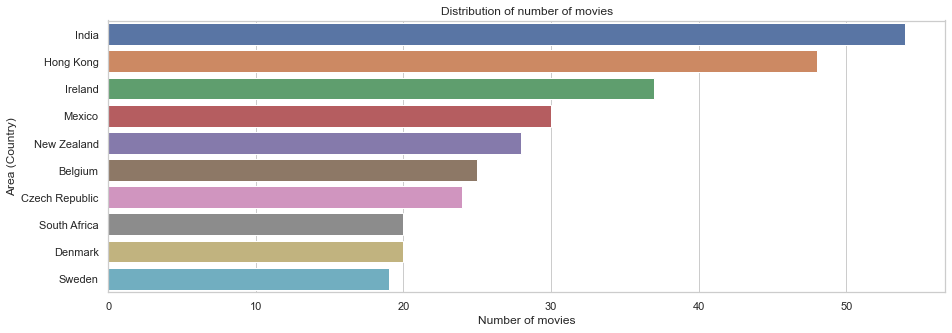

In [26]:
# Create new dictionary to visualize
new_dict = {'Area (Country)' : countries_10.keys(), 'Number of movies': countries_10.values()}
new_frame = pd.DataFrame(data=new_dict)
sns.set(style="whitegrid")
Barplot_country = sns.barplot(y="Area (Country)", x = "Number of movies", data=new_frame)
Barplot_country.set_title('Distribution of number of movies')

From the chart, United States of America have the most number of movies, more than 6 times higher than United Kingdom at the second rank.

Conclusion: **United States of America has the greatest influence on film revenue.**

### How is movie's revenue and average score affected by its genre?

In [39]:
# Add column of genres of movie as one hot coding
def json_to_one_hot_coding(df, column):
    for row in range(len(df)+1):
        try: 
            row_sample = df[column].loc[row]
            series = pd.read_json(row_sample).name
            for j in range(len(series)):
                cell = series[j]
                df.loc[row, cell] = 1
        except AttributeError:
            continue
        except KeyError:
            continue
           
json_to_one_hot_coding(df,"genres")

# replace NaN to 0 and convert column to int type
for i in df.columns[20:41]:
    df[i].fillna(0, inplace=True)
    df[i] = df[i].astype(np.int8)

ValueError: Invalid file path or buffer object type: <class 'list'>

<AxesSubplot:>

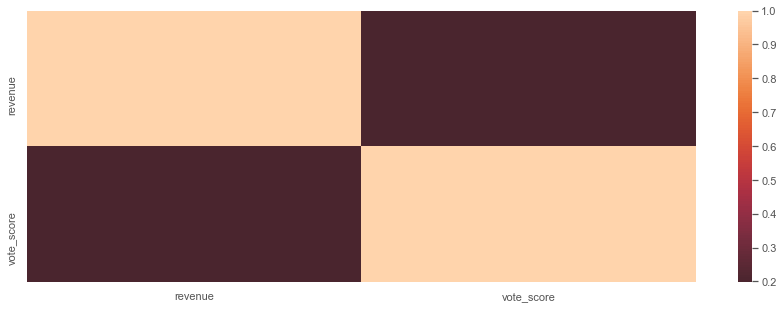

In [37]:
# create new DataFrame from genres and add 2 columns
corr = df.iloc[:,20:41]
corr['revenue'] = df.revenue # Add revenue column
corr['vote_score'] = df.vote_average # Add vote_score
corr = corr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

### What influence does release date have on revenue?

In [33]:
def to_day(date):
    y, m, d = str(date)[:10].split("-")
    return d

# Convert y-m-d to m:
def to_month(date):
    y, m, d = str(date)[:10].split("-")
    return m

# Convert to datetime format
df.release_date = pd.to_datetime(df.release_date)
# Create a new day of the week column
df['Day_of_week'] = df.release_date.dt.weekday
# Convert day of the week in number to text:
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = {key : day_names[key] for key in range(7)}
df['Day_of_week'] = df.Day_of_week.apply(lambda x: weekday_dict[x])

df['day'] = df.release_date.apply(to_day)
df['month'] = df.release_date.apply(to_month)

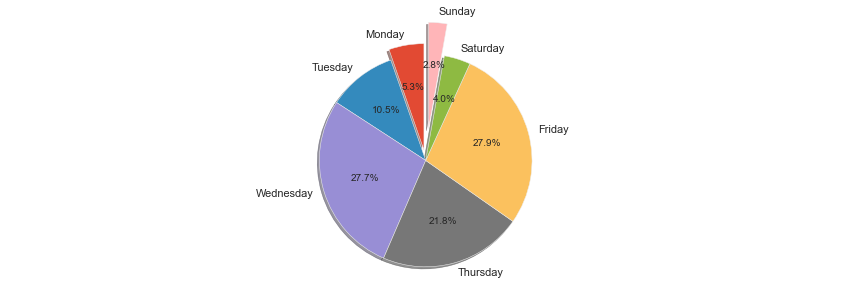

In [34]:
sum_DOW = df.groupby("Day_of_week").sum() # Group tables by day of the week
sum_DOW = sum_DOW.loc[day_names] # Sort by day of the week order

explode = (0.1, 0, 0, 0, 0, 0, 0.3) 
fig1, chart_DOW = plt.subplots()
chart_DOW.pie(sum_DOW.revenue, explode=explode, labels=sum_DOW.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
chart_DOW.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The biggest revenue is on Wednesday and Friday

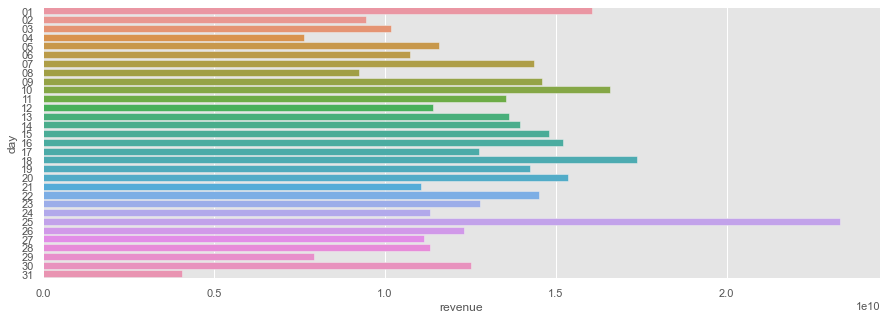

In [35]:
sum_DOM = df.groupby("day").sum() # Group tables by day of the month
sum_DOM['day'] = sum_DOM.index
chart_DOM = sns.barplot(y = "day", x = "revenue", data=sum_DOM)

The biggest revenue is on 25th

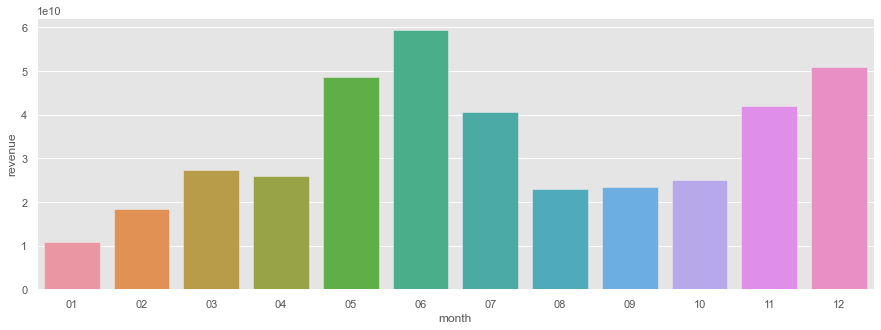

In [36]:
month_sum = df.groupby("month").sum()
month_sum['month'] = month_sum.index

chart_MOY = sns.barplot(x="month", y = "revenue", data=month_sum)

The biggest revenue is in June

## 5.Conclusion

Based on the charts and statistical analyzes above, we answer 3 questions in introduction:

> 1/ The area with the most impact on revenue is the United State of America

> 2/ Genres does not affect vote average and revenue.

> 3/ Movies released on Wednesdays and Fridays each week, or 25th of each month, or in June each year will have the highest revenue.